In [20]:
import numpy as np
import matplotlib.pyplot as plt

An exponential decay starting at $t = 1706$ will be a nonlinear model.   

The model will look something like:
$$y(t) = Ae^{-k(t-b)} + C$$

and as we vary k, y will vary non-linearly.

## 1a) 

Plotting the data...

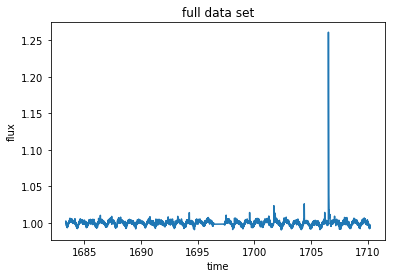

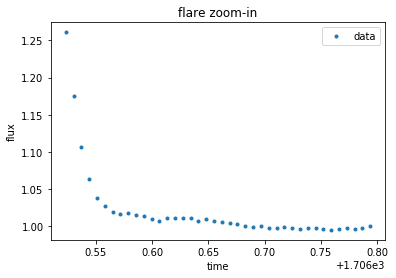

In [21]:
data = np.loadtxt('229614158_PDCSAP_SC6.txt', delimiter=',')
#print(data[0])
x = data[:,0]
y = data[:,1]

plt.plot(x, y)
plt.title('full data set')
plt.xlabel('time')
plt.ylabel('flux')
plt.show()

#Slice around where the flare is
x_flare = x[3200:3240]
y_flare = y[3200:3240]
plt.plot(x_flare, y_flare, '.', label ='data')
plt.title('flare zoom-in')
plt.xlabel('time')
plt.ylabel('flux')
plt.legend()
plt.show()

In [22]:
def fun_model(params, x):
    #params[0] = A, constant factor
    #params[1] = k, decay constant
    #params[2] = b, x offset
    #params[3] = C, constant offset
    
    grad=np.zeros([len(x), len(params)])
    #differentiate w.r.t. all the parameters
    grad[:,0]=np.exp(-1.0*params[1]*(x-params[2]))
    #grad[:,1]=-1.0*((x-params[2]))*params[0]*np.exp(-1.0*params[1]*(x-params[2]))
    grad[:,1]=params[0]*np.exp(-1.0*params[1]*(x-params[2]))
    grad[:,2]= params[1]*np.exp(-1.0*params[1]*(x-params[2]))
    grad[:,3]=1.0

    
    return params[0]*np.exp(-1.0*params[1]*(x-params[2])) + params[3], grad

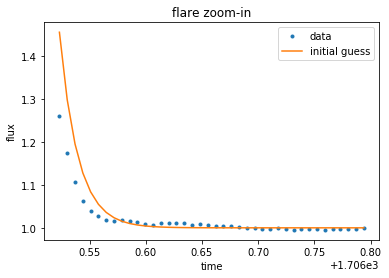

In [27]:
#Slice around where the flare is
start_time_guess = 0.85+1.706e3
guess_params = [1e-9, 61, start_time_guess, 1.0]
guess_model= fun_model(guess_params, x_flare)[0]
plt.plot(x_flare, y_flare, '.', label ='data')
plt.plot(x_flare, guess_model, '-', label ='initial guess')
plt.title('flare zoom-in')
plt.xlabel('time')
plt.ylabel('flux')
plt.legend()
plt.show()

In [28]:
params=guess_params
chisq = 1
for j in range(50000):
    pred,grad=fun_model(params,x_flare)
    residual=y_flare-np.array(pred)
    #print(residual)
    chi_sq_new=(residual**2.0).sum()
    #print(err)
    residual=np.matrix(residual).transpose()
    grad=np.matrix(grad)
    LHS=grad.transpose()*grad
    RHS=grad.transpose()*residual
    dp=np.linalg.pinv(LHS)*(RHS)
    for jj in range(len(params)):
        params[jj]=params[jj]+dp[jj]
    #print params,chi_sq_new
    if (np.abs(chisq - chi_sq_new)/chisq  < 1e-7 and j>0):
        print('Stopped after %i iterations.'%j)
        #An attempt... https://github.com/sievers/phys512/blob/master/lecture_6/fit_amp_data_werrs.py
        #noise = (y-pred)
        #print(noise)
        #noise = np.squeeze(np.asarray(noise))
        #Ninv=np.eye(len(y))/noise**2.0
        #lhs = np.dot(grad.transpose(),np.dot(Ninv, grad))
        #lhs_inv = np.linalg.inv(lhs)
        #rhs= np.dot(grad.transpose(), y)
        #cov_matrix=np.dot(grad,np.dot(lhs_inv,grad.transpose())) #covariance matrix
        #fit_errs=np.sqrt(np.diag(cov_matrix)) #Errors are sqrt of diagonal of covariance
        #print(cov_matrix)
        #print(np.diag(cov_matrix))
        #Nevermind...
        break
    else:
        chisq = chi_sq_new
    
#print(pred)
#print(type(pred[0]))
pred = np.squeeze(np.asarray(pred))

print('best fit: '+repr(params))

Stopped after 23181 iterations.
best fit: [matrix([[5.68480669e-10]]), matrix([[61.]]), matrix([[1706.84999997]]), matrix([[1.]])]


## 1b)
The method stops after 23181 iterations with best fit parameters for the function:

$$y(t) = Ae^{-k(t-b)} + C$$

$A = 5.68 \cdot 10^{-10}$, $k=61.0$, $b = 1706.849$, $C=1.0$

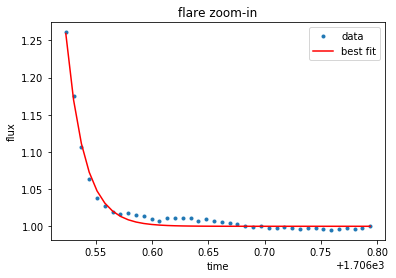

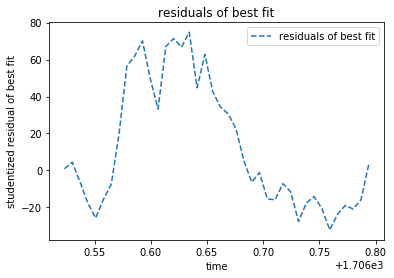

In [30]:
plt.plot(x_flare, y_flare, '.', label ='data')
#plt.plot(x, guess_model, '-', label ='initial guess')
plt.plot(x_flare,pred, label ='best fit', ls='-', color='red')
#plt.plot(x_flare,pred+fit_errs, label ='error band', ls='--')
#plt.plot(x_flare,pred-fit_errs, label ='error band', ls='--')
plt.title('flare zoom-in')
plt.xlabel('time')
plt.ylabel('flux')
plt.legend()
plt.show()


#plt.plot(x,y-guess_model, label ='residuals of guess', ls='--')
#plt.plot(x,y-pred, label ='residuals of best fit', ls='--')
plt.plot(x_flare,(y_flare-pred)/fit_errs, label ='residuals of best fit', ls='--')
plt.title('residuals of best fit')
plt.xlabel('time')
plt.ylabel('studentized residual of best fit')
plt.legend()
plt.show()

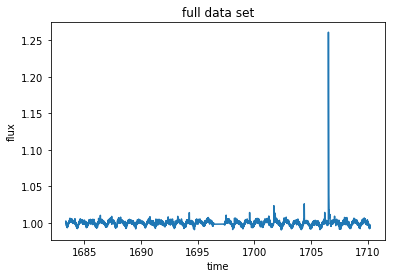

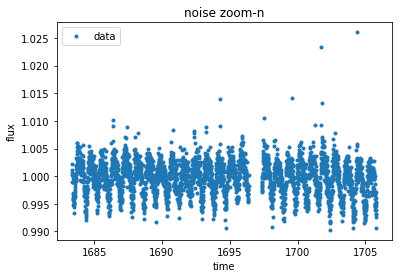

mean of noise before flare is: 1.0000 with a standard deviation of: 0.0064: 


In [31]:
plt.plot(x, y)
plt.title('full data set')
plt.xlabel('time')
plt.ylabel('flux')
plt.show()

#Slice before the flare only
x_before = x[:3100]
y_before = y[:3100]
plt.plot(x_before, y_before, '.', label ='data')
plt.title('noise zoom-n')
plt.xlabel('time')
plt.ylabel('flux')
plt.legend()
plt.show()

print('mean of noise before flare is: %.4f with a standard deviation of: %.4f: '%(np.mean(y), np.std(y)))

## 1c)
Say we vary our data points by a gaussian with std of the noise before the flare (0.0031) centered about zero. how will our fit parameters change?

Additionally this is a non-linear fit, so errors are a bit more complicated to get easily. 